🎯 Desafio dia 86 — Uso de Internet por Dispositivos

📂 Dataset: desafio_dia_86_uso_internet.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Uma operadora de internet está avaliando o padrão de uso de dados em diferentes dispositivos, com o objetivo de melhorar seus planos e serviços.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Preencha os valores ausentes em consumo_gb_mes com a média.

- Preencha os valores ausentes em satisfacao com a moda.

📊 Análise geral
- Qual dispositivo apresenta maior consumo médio mensal de dados?

- Qual plano de internet tem maior concentração de usuários no período da noite?

📈 Visualização de dados
- Crie um gráfico de barras com a média de consumo mensal (consumo_gb_mes) por tipo de dispositivo.

🤖 Machine Learning - Regressão
- Crie um modelo para prever a satisfacao com base em:

dispositivo, plano_internet, periodo_uso, consumo_gb_mes

Utilize:

train_test_split

get_dummies

RandomForestRegressor

Avalie com mean_squared_error.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_86_uso_internet.csv")
df.head()

,id_usuario,dispositivo,plano_internet,periodo_uso,consumo_gb_mes,satisfacao
0,1148,Smartphone,Intermediário,Madrugada,69.0,NaN
1,1864,Smart TV,Avançado,Manhã,55.8,3.0
2,1428,Notebook,Básico,Madrugada,137.0,5.0
3,1796,Desktop,Intermediário,Tarde,53.2,4.0
4,1099,Tablet,Intermediário,Noite,85.6,1.0


In [3]:
#Preencha os valores ausentes em consumo_gb_mes com a média.
df["consumo_gb_mes"] = df["consumo_gb_mes"].fillna(df["consumo_gb_mes"].mean())
df["consumo_gb_mes"].isna().sum()

0

In [4]:
#Preencha os valores ausentes em satisfacao com a moda.
df["satisfacao"] = df["satisfacao"].fillna(df["satisfacao"].mode()[0])
df["satisfacao"].isna().sum()

0

In [6]:
#Qual dispositivo apresenta maior consumo médio mensal de dados?
dispositivo_consumo_dados_mensal = df.groupby("dispositivo")["consumo_gb_mes"].mean().sort_values(ascending=False)
print(dispositivo_consumo_dados_mensal)

dispositivo
Notebook      82.255850
Smartphone    76.773333
Desktop       75.356724
Tablet        71.023292
Smart TV      70.969356
Name: consumo_gb_mes, dtype: float64


In [10]:
#Qual plano de internet tem maior concentração de usuários no período da noite?
periodo = df[df["periodo_uso"] == "Noite"]
concentracao_internet_noite = periodo.groupby("plano_internet")["periodo_uso"].value_counts().sort_values(ascending=False)
print(concentracao_internet_noite)

plano_internet  periodo_uso
Básico          Noite          63
Intermediário   Noite          53
Avançado        Noite          22
Name: count, dtype: int64


Text(0.5, 0, 'Dispositivo')

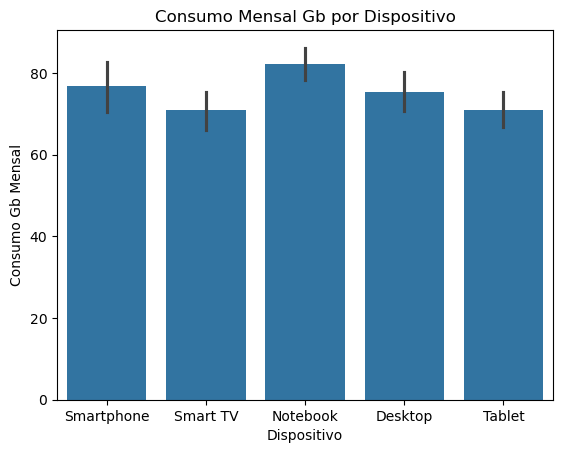

In [16]:
#Crie um gráfico de barras com a média de consumo mensal (consumo_gb_mes) por tipo de dispositivo.
sns.barplot(df, x="dispositivo", y="consumo_gb_mes")
plt.title("Consumo Mensal Gb por Dispositivo")
plt.ylabel("Consumo Gb Mensal")
plt.xlabel("Dispositivo")

In [18]:
#Crie um modelo para prever a satisfacao com base em:
X = df[["dispositivo", "plano_internet", "periodo_uso", "consumo_gb_mes"]]
y = df["satisfacao"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.3664031141770598
